In [21]:
%load_ext autoreload
%autoreload 1
%matplotlib inline
%aimport oct_tf

import numpy as np
import os
import tensorflow as tf
import matplotlib
from matplotlib import pyplot as plt
from skimage.color import gray2rgb
from skimage.transform import resize
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [14]:
def get_images(N, class_name, root_folder):
    images = []
    for root, dir, files in os.walk(root_folder):
        if root.split(os.sep)[-1] == class_name:
            for i, file in enumerate(files):
                print(file)
                if file.endswith('.jpeg'):
                    images.append(plt.imread(os.path.join(root,file)))
                if i+1 == N:
                    return images

CNV-6294785-1.jpeg
DME-9583225-1.jpeg
DRUSEN-9800172-2.jpeg
NORMAL-4872585-1.jpeg


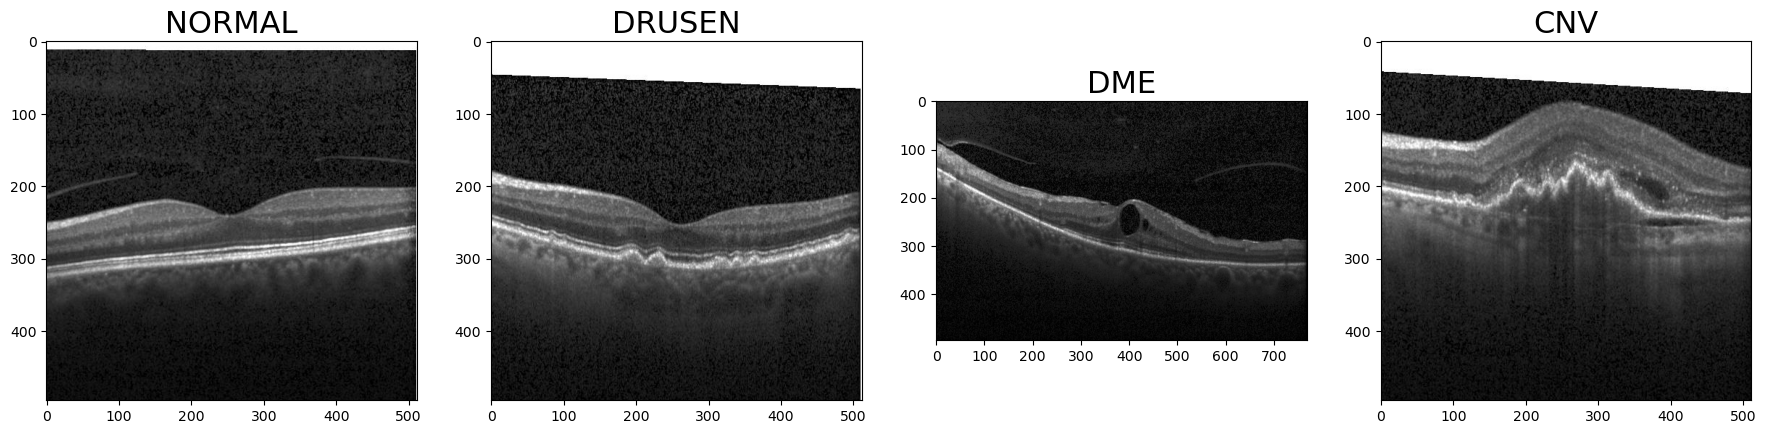

In [24]:
N = 1
folder     = os.path.join('.', 'archive', 'OCT2017', 'val')
CNVimages  = get_images(N, 'CNV', folder)
DMEimages  = get_images(N, 'DME', folder)
DRUSENimages  = get_images(N, 'DRUSEN', folder)
NORMALimages  = get_images(N, 'NORMAL', folder)

fig, axs = plt.subplots(1, 4, figsize=(22,5))

ax = axs[3]
ax.set_title("CNV", fontsize=22)
ax.imshow(gray2rgb(CNVimages[0]))

ax = axs[2]
ax.set_title("DME", fontsize=22)
ax.imshow(gray2rgb(DMEimages[0]))

ax = axs[1]
ax.set_title("DRUSEN", fontsize=22)
ax.imshow(gray2rgb(DRUSENimages[0]))

ax = axs[0]
ax.set_title("NORMAL", fontsize=22)
ax.imshow(gray2rgb(NORMALimages[0]))

In [3]:
classes = ['CNV', 'DME', 'DRUSEN', 'NORMAL']
num_classes = 4
dims = (244, 244)
batch_size = 512
num_epochs = 10  

t_transform = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest'
)

v_transform = ImageDataGenerator(
    rescale=1/255,
    fill_mode='nearest'
)

train_generator = t_transform.flow_from_directory(
  os.path.join('.', 'archive', 'OCT2017', 'train'),
  target_size = dims,
  batch_size = batch_size,
  class_mode = 'categorical',
  shuffle = True
)

validation_generator = v_transform.flow_from_directory(
  os.path.join('.', 'archive', 'OCT2017', 'val'),
  target_size = dims,
  batch_size = batch_size,
  class_mode = 'categorical',
  shuffle = True
)

Found 83484 images belonging to 4 classes.
Found 32 images belonging to 4 classes.


In [4]:
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(dims[0], dims[1], 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(dims[0], dims[1], 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(dims[0], dims[1], 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(dims[0], dims[1], 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(256, (3, 3), activation='relu', input_shape=(dims[0], dims[1], 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))

In [5]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 

In [6]:
history = model.fit(
    train_generator,
    epochs=num_epochs,
    validation_data=validation_generator,
) 

Epoch 1/10
164/164 [==============================] - 2792s 17s/step - loss: 0.8212 - accuracy: 0.7192 - val_loss: 1.4278 - val_accuracy: 0.2500
Epoch 2/10
164/164 [==============================] - 2222s 14s/step - loss: 0.4465 - accuracy: 0.8438 - val_loss: 1.0611 - val_accuracy: 0.6562
Epoch 3/10
164/164 [==============================] - 2038s 12s/step - loss: 0.3166 - accuracy: 0.8939 - val_loss: 0.2864 - val_accuracy: 0.9688
Epoch 4/10
164/164 [==============================] - 2067s 13s/step - loss: 0.2653 - accuracy: 0.9137 - val_loss: 0.1169 - val_accuracy: 1.0000
Epoch 5/10
164/164 [==============================] - 2027s 12s/step - loss: 0.2388 - accuracy: 0.9214 - val_loss: 0.0981 - val_accuracy: 1.0000
Epoch 6/10
164/164 [==============================] - 2000s 12s/step - loss: 0.2166 - accuracy: 0.9296 - val_loss: 0.1491 - val_accuracy: 0.9062
Epoch 7/10
164/164 [==============================] - 1968s 12s/step - loss: 0.1980 - accuracy: 0.9354 - val_loss: 0.1200 - val_ac

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [7]:
test_transform = ImageDataGenerator(rescale=1./255)
test_generator = test_transform.flow_from_directory(
    os.path.join('.', 'archive', 'OCT2017', 'test'),
    target_size = dims,
    batch_size = batch_size,
    class_mode = 'categorical'
)

test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}') 

Found 968 images belonging to 4 classes.
2/2 [==============================] - 17s 13s/step - loss: 0.1452 - accuracy: 0.9649
Test accuracy: 0.9648760557174683


In [8]:
model.save("oct_model.keras")

NameError: name 'plt' is not defined